# Capstone Two: EDA

In this step for my capstone, I am going to examine the data to find some initial hypotheses and relationships in the data. 

In [6]:
# import libraries and format output
import numpy as np
import pandas as pd
import seaborn as sns
import os
from library.sb_utils import save_file
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.read_csv("./data/training_data_cleaned.csv")

In [14]:
df.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-02-01,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-03-01,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-05-01,0,25,2552,899.00,-1.00,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-06-01,0,25,2554,1709.05,1.00,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,2013-10-01,0,25,2564,349.00,1.00,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
6,2013-02-01,0,25,2565,549.00,1.00,DEEP PURPLE Stormbringer (фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
7,2013-04-01,0,25,2572,239.00,1.00,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
8,2013-11-01,0,25,2572,299.00,1.00,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
9,2013-03-01,0,25,2573,299.00,3.00,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


In [13]:
# The goal is to predict total sales for every product and store
# we should start by examining the data types to learn what kind of analysis we can reasonably perform
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935843 entries, 0 to 2935842
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB


Of the object categories (date, item_name, item_category_name, shop_name), all but date are not going to be useful in this. Thus, I am going to drop the item_name, item_category_name, shop_name columns and convert datre into datetime. 

In [16]:
df.drop(['item_name', 'item_category_name', 'shop_name'], axis=1, inplace=True)

In [21]:
df['date'] = pd.to_datetime(df.date)

In [22]:
df.dtypes

date                datetime64[ns]
date_block_num               int64
shop_id                      int64
item_id                      int64
item_price                 float64
item_cnt_day               float64
item_category_id             int64
dtype: object

We are trying to predict the total sales for every product and store for the next month
The important features are going to be sales in next month - lets find when that is. 

In [29]:
df.date_block_num.describe()

count   2935843.00
mean         14.57
std           9.42
min           0.00
25%           7.00
50%          14.00
75%          23.00
max          33.00
Name: date_block_num, dtype: float64

In [30]:
df['']

C:\Users\cfran\AppData\Local\Temp/ipykernel_5952/1371252037.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                 2935843
unique                   1034
top       2013-12-28 00:00:00
freq                     9434
first     2013-01-01 00:00:00
last      2015-12-10 00:00:00
Name: date, dtype: object

Let's examine our data with a scatterplot and a heatmap. 

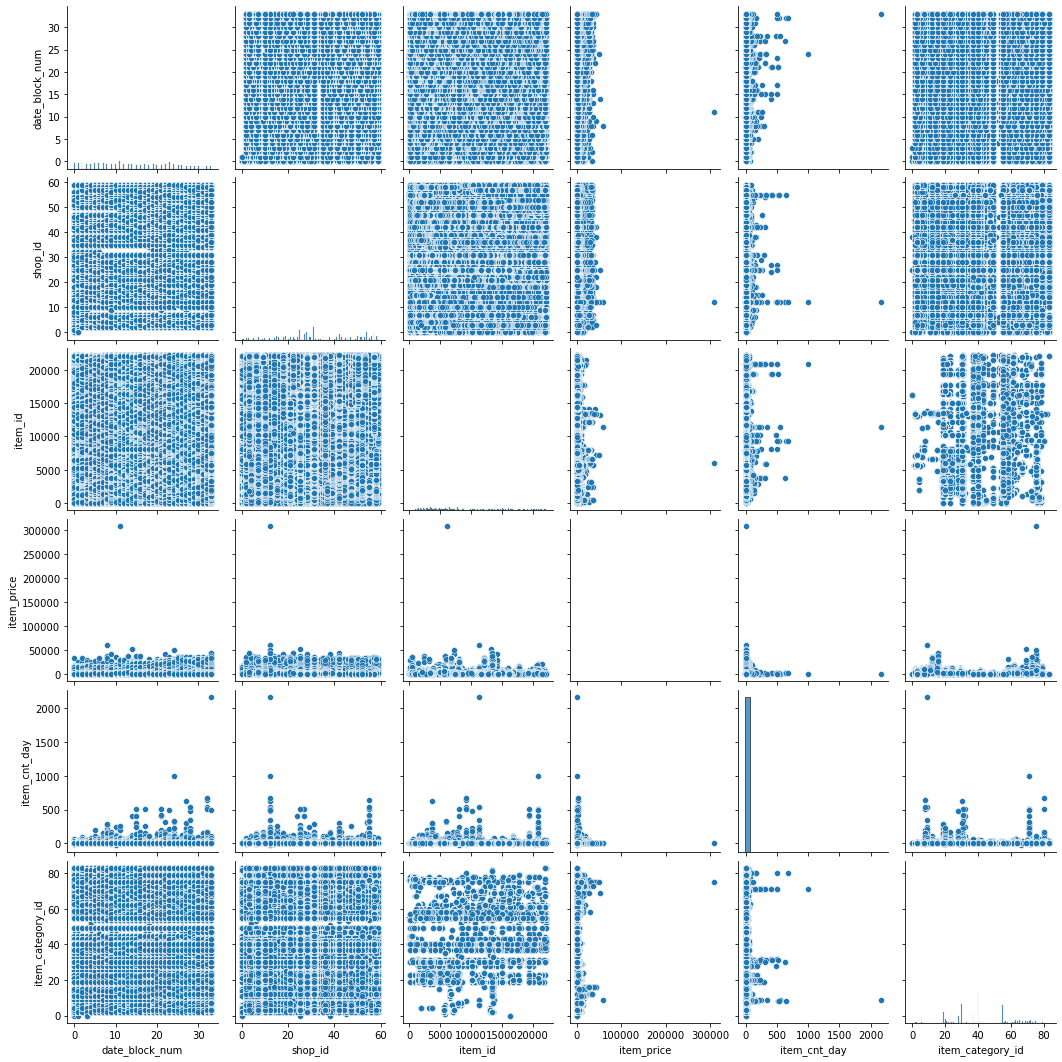

In [26]:
sns.pairplot(df)

<AxesSubplot:>

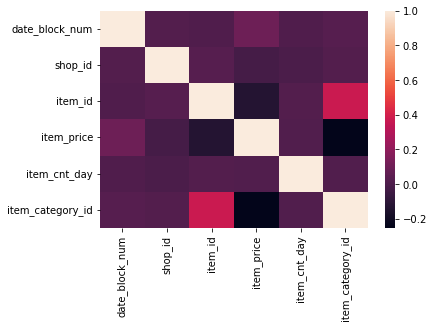

In [24]:
sns.heatmap(df.corr())

Seems like there are no strong positive or negative correlations. 
Let's jump into the machine learning!

In [28]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_id'],
      dtype='object')

In [ ]:
# Subsetting our data into our dependent and independent variables.
X = df[['density']]

# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)